In [ ]:
'''
MLP for relative loss
'''

In [1]:
import torch
import torch.nn as nn

In [ ]:
import pandas as pd
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split


batch_size = 1  
train_ratio = 0.8 
test_ratio = 1 - train_ratio

data = pd.read_csv('dataset.csv', header=0)


selected_data = data.iloc[:, 1:] 

selected_data = selected_data.apply(pd.to_numeric, errors='coerce')

if selected_data.isnull().values.any():
    print("nan exist")
    selected_data = selected_data.fillna(0)


data_tensor = torch.tensor(selected_data.values, dtype=torch.float32)

print(data_tensor.shape)

X = data_tensor[:, :-1]  
y = data_tensor[:, -1]  


dataset = TensorDataset(X, y) 
total_size = len(dataset)
train_size = int(total_size * train_ratio)
test_size = total_size - train_size

train_dataset, test_dataset = random_split(dataset, [train_size, test_size]) 


train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


torch.Size([49152, 9])
训练集大小: 39321
测试集大小: 9831
Batch Size: 1


In [ ]:
for inputs, targets in train_loader:
    print(f"input shape: {inputs.shape}") 
    print(f"target shape: {targets.shape}")  
    print(f"random input: {inputs[0]}")  
    testin = inputs[0]
    testtarget=targets[0]
    print(f"target: {targets[0]}")  
    break  # 

In [ ]:
print(testin,testtarget)
print(testin.shape,testtarget.shape)

In [ ]:
print(testin.shape)
testin=testin.unsqueeze(0)
testin.to(device)
print(testin.shape)
#testout = model(testin)
#print(testout)

In [ ]:
model.to(device)
testin = testin.to(device)
#model.cuda()
#print(model.device)
testout = model(testin)
print(testout)

In [ ]:
criterion = nn.MSELoss()
testtarget = testtarget.to(device)
loss = criterion(testout, testtarget)
print(loss)

In [ ]:
class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),  
            nn.Linear(8, 128),  
            nn.ReLU(), 
            nn.Linear(128, 256), 
            nn.ReLU(),  
            nn.Linear(256, 128), 
            nn.ReLU(),  
            nn.Linear(128, 64),  
            nn.ReLU(), 
            nn.Linear(64, 1)  
        )
    
    def forward(self, x):
        return self.model(x)


In [ ]:
def train(model, train_loader, optimizer, epoch, device):
    model.train()
    criterion = nn.MSELoss()
    losses = []
    top1_acc = []
    print_losses = []  


    for i, (inputs, target) in enumerate(train_loader):
        optimizer.zero_grad()
        inputs, target = inputs.to(device), target.to(device)
        
        # Forward pass
        output = model(inputs)
        loss = criterion(output, target)
        res = loss/target

        # Compute accuracy
        #preds = torch.argmax(output, dim=1)
        #acc = (preds == target).float().mean().item()

        # Record loss and accuracy
        losses.append(res.item())
        #top1_acc.append(acc)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        if (i + 1) % 300 == 0:
            avg_loss = torch.tensor(losses).mean().item()
            print_losses.append(avg_loss)  
            print(
                f"\tTrain Epoch: {epoch} \t"
                f"Loss: {torch.tensor(losses).mean():.6f} "
                #f"Acc@1: {torch.tensor(top1_acc).mean() * 100:.2f}%"
            )
            losses = [] 
    return print_losses


In [ ]:
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

all_losses = []
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleMLP().to(device)


#transform = transforms.Compose([transforms.ToTensor()])
#train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
#test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

#train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
#test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

optimizer = optim.Adam(model.parameters(), lr=0.001)


for epoch in range(5):  
    epoch_losses=train(model, train_loader, optimizer, epoch, device)
    all_losses.extend(epoch_losses)



/home/rdj4nv/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


	Train Epoch: 0 	Loss: 58.409855 
	Train Epoch: 0 	Loss: 41.299236 
	Train Epoch: 0 	Loss: 31.271807 
	Train Epoch: 0 	Loss: 32.449284 
	Train Epoch: 0 	Loss: 29.048334 
	Train Epoch: 0 	Loss: 22.880707 
	Train Epoch: 0 	Loss: 28.877447 
	Train Epoch: 0 	Loss: 25.471552 
	Train Epoch: 0 	Loss: 23.225531 
	Train Epoch: 0 	Loss: 28.771189 
	Train Epoch: 0 	Loss: 19.056957 
	Train Epoch: 0 	Loss: 26.824205 
	Train Epoch: 0 	Loss: 15.513762 
	Train Epoch: 0 	Loss: 23.865952 
	Train Epoch: 0 	Loss: 18.690367 
	Train Epoch: 0 	Loss: 23.787090 
	Train Epoch: 0 	Loss: 18.866137 
	Train Epoch: 0 	Loss: 21.321712 
	Train Epoch: 0 	Loss: 12.587451 
	Train Epoch: 0 	Loss: 18.068451 
	Train Epoch: 0 	Loss: 18.451284 
	Train Epoch: 0 	Loss: 21.025869 
	Train Epoch: 0 	Loss: 17.473173 
	Train Epoch: 0 	Loss: 20.871534 
	Train Epoch: 0 	Loss: 15.882034 
	Train Epoch: 0 	Loss: 13.111792 
	Train Epoch: 0 	Loss: 20.420361 
	Train Epoch: 0 	Loss: 17.366932 
	Train Epoch: 0 	Loss: 19.285690 
	Train Epoch: 

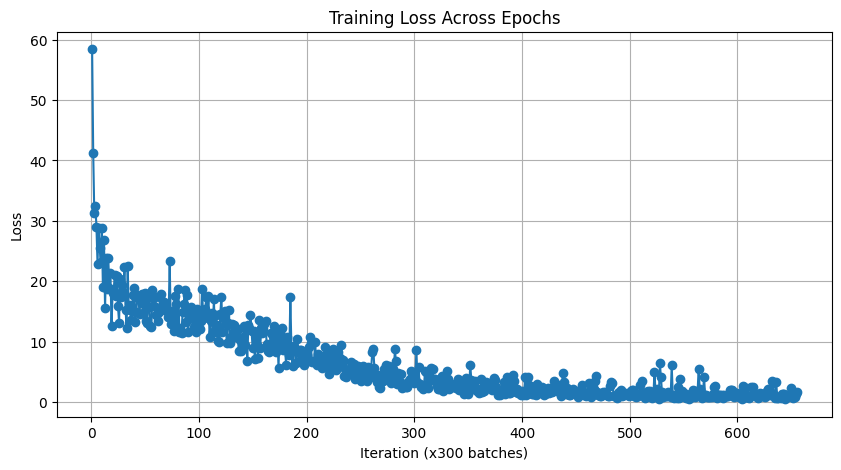

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(all_losses) + 1), all_losses, marker='o')
plt.xlabel('Iteration (x300 batches)')
plt.ylabel('Loss')
plt.title('Training Loss Across Epochs')
plt.grid()
plt.show()

In [ ]:
torch.save(model.state_dict(), 'model_relative_trained.pth')


#model.load_state_dict(torch.load('model_dfa_16_fashion_weights_trained.pth'))

In [ ]:
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()}")

In [ ]:
test_in = torch.randn(32,28*28).to(device)
test_target = torch.randint(0, 10, (32,), dtype=torch.long).to(device)
#target_tensor = torch.randint(0, 10, (32,), dtype=torch.long)
model = model.to(device)
output = model(test_in)
print(f'output size:{output.shape}')
criterion = nn.CrossEntropyLoss()
loss = criterion(output, test_target)
loss.backward()

In [ ]:
testin = torch.randn(1,8).to(device)
print(testin)
testout = model(testin)
print(testout)